# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 1 : Reservas de Hotel</center>
## <center>Checkpoint 1</center>
### <center> </center>

#### Integrantes grupo 19: Sudanalytics 
* Adrian Leandro Re
* Alan Toulouse
* Luciano Lorenzo 108951

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Cargamos 3 data frames, el de todos los registros, y dos que nos servirán para analizar las demás columnas en función del **target** (`is_canceled`).

In [134]:
df  = pd.read_csv("../dataset/hotels_train.csv")
df_cancelado = df[df.is_canceled == 1]
df_no_cancelado = df[df.is_canceled == 0]
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,NaN,0,Transient,229.0,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,NaN,0,Transient,75.0,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,NaN,0,Transient-Party,75.0,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


In [135]:
df['is_canceled'].value_counts(normalize=True)

0    0.50025
1    0.49975
Name: is_canceled, dtype: float64

Lo primero a tener en cuenta en el dataset de entrenamiento es que (casi) la mitad de los registros son de cancelaciones y la otra mitad no. Esto nos dice que al analizar independientemente una variable, esta no va a tener **individualmente** una relación con la cancelación de la reservación si tiene mitad de registros de cancelaciones y la otra mitad no cancelaciones.

Esto no quiere decir necesariamente que la mitad de las reservaciones fueron canceladas, sino más bien que fueron seleccionadas para que haya la misma cantidad de registros de ambas para su análisis.

# Variables

1. **Hotel**: variable categórica que nos dice en que hotel fue hecha la reserva. Los posibles valores que puede tomar son:
    - City Hotel
    - Resort Hotel.

In [136]:
df['hotel'].isnull().sum()

0

No presenta valores faltantes.

Text(0.5, 1.0, 'cantidad de reservas por hotel')

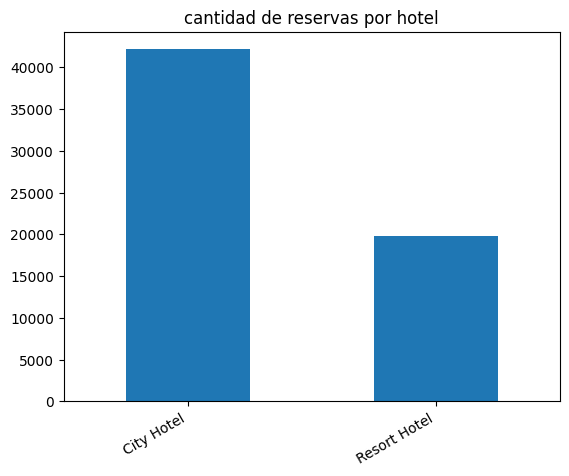

In [137]:
df['hotel'].value_counts().plot(kind='bar')
plt.xticks(rotation=30,horizontalalignment='right')
plt.title('cantidad de reservas por hotel')

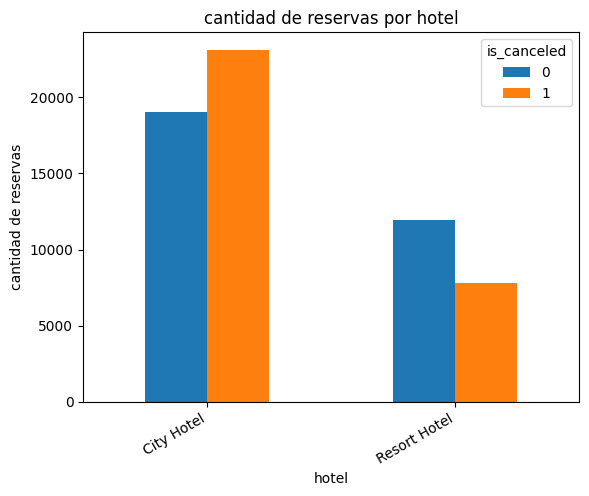

In [138]:
pd.crosstab(df.hotel, df.is_canceled).plot(kind='bar')
plt.xticks(rotation=30,horizontalalignment='right')
plt.ylabel('cantidad de reservas')
plt.title('cantidad de reservas por hotel')
plt.show()

Observamos que es una variable importante con relación al problema, ya que de hecho se podrían hacer estudios separados para cada hotel. Pero lo más importante es que el 'City Hotel' presenta una significante cantidad superior de reservas canceladas, mientras que el 'Resort Hotel' es al contrario, presenta más reservasa no canceladas.

Es muy fácil hacer un encoding para las categorías, ya que se trata de un caso binario. Creamos una nueva variable y le asignamos 1 al 'Resort Hotel' y 0 al 'City Hotel'

In [139]:
df['hotel_encoding'] = np.where(df['hotel'] == 'Resort Hotel', 1, 0)

2. `stays_in_week_nights`: Variable numérica (entero) que nos dicen cuantas noches de **días de semana** se quedan los huéspedes.
    - *Moda:* 2
    - *Media:* 2.510
    - *Mediana:* 2
    
3. `stays_in_weekend_nights`: Variable numérica (entero) que nos dice cuantas noches de **fin de semana** se quedan los huéspedes. 
    - *Moda:* 0
    - *Media:* 0.9241
    - *Mediana:* 1

In [140]:
df['stays_in_week_nights'].isnull().sum()

0

In [141]:
df['stays_in_weekend_nights'].isnull().sum()

0

Ninguna de las variables presenta valores faltantes.

<Axes: >

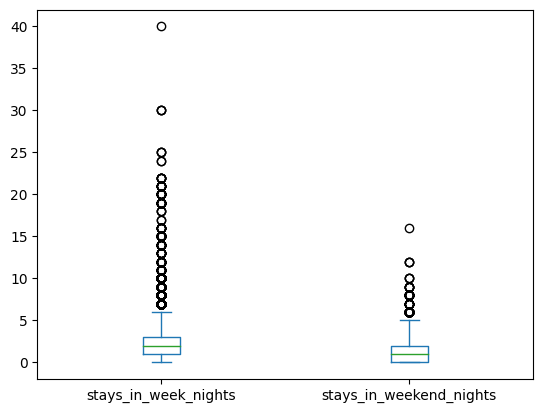

In [142]:
df[['stays_in_week_nights', 'stays_in_weekend_nights']].plot(kind='box')

4. `arrival_date_year`: variabe numérica nos dice el año para el cual se reservó la habitación. Los valores están entre 2015 y 2017

Si tenemos en cuenta que queremos crear un modelo que pueda predecir si una nueva reserva va a ser cancelada o no, es inútil entrenar a nuestro modelo explicitando los años anteriores. Es decir, no queremos encontrar un patrón con respecto a un año específico, ya que el hotel no va a volver a recibir reservaciones de un año que ya pasó.
En cambio queremos encontrar patrones que generalicen a cualquier año y ayuden al modelo a determinar si la reserva va a ser cancelada. Por ejemplo, encontrando que a principios de año se producen más cancelaciones que a final de año, o algo por el estilo.

Por estas razones creemos que la variable `arrival_date_year` es irrelevante para el análisis.

4. `arrival_date_week_number`: variable numérica que nos indica la semana del año para la cual reservaron los huéspedes. 
    - *Moda:* 33
    - *Media:* 27.2
    - *Mediana:* 28

Podemos plottear la distribucion de reservaciones canceladas y no canceladas durante todo el año:

In [143]:
df['arrival_date_week_number'].isnull().sum()

0

Esta variable no presenta valores faltantes.

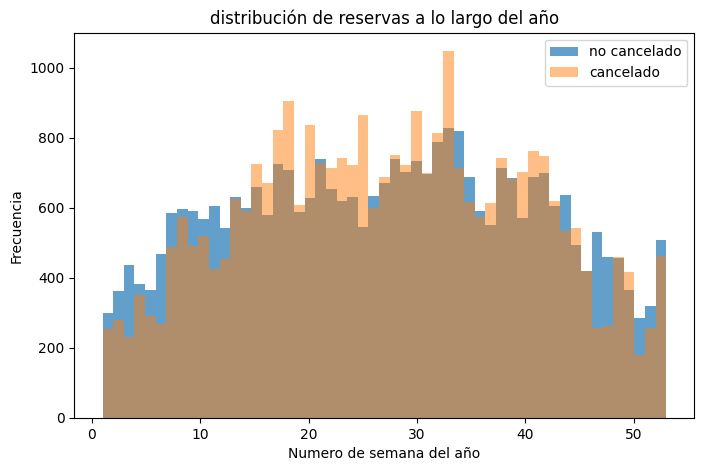

In [144]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
df.loc[df.is_canceled == 0, 'arrival_date_week_number'].plot(kind='hist', bins=53, alpha=0.7, ax=ax, label='no cancelado')
df.loc[df.is_canceled == 1, 'arrival_date_week_number'].plot(kind='hist', bins=53, alpha=0.5, ax=ax, label='cancelado')
ax.legend()
ax.set_xlabel("Numero de semana del año")
ax.set_ylabel("Frecuencia")
ax.set_title("distribución de reservas a lo largo del año")
plt.show()

Observamos que sobre la mitad del año se producen la mayor cantidad de reservaciones, este es el verano en los hoteles (recordemos que quedan en Portugal). Y también es donde se observan la mayor cantidad de picos de reservas canceladas.

5. `arrival_date_month`: es una variable categorica que nos indica el mes para el cual reservaron:

Verificamos que en esta variable no se presentan valores faltantes.

In [145]:
df['arrival_date_month'].isnull().sum()

0

Podemos realizar un análisis parecido como con `arrival_date_week_number`, pero para cada mes:

In [ ]:
dd = pd.DataFrame({
    'cancelado': df.loc[df.is_canceled == 1, 'arrival_date_month'].value_counts(),
    'no_cancelado': df.loc[df.is_canceled == 0, 'arrival_date_month'].value_counts(),
},index= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

dd['ppt_cancelado']  =  dd['cancelado']  / (dd['cancelado'] + dd['no_cancelado'])
dd['ppt_no_cancelado']  =  dd['no_cancelado']  / (dd['cancelado'] + dd['no_cancelado'])

dd[['ppt_cancelado', 'ppt_no_cancelado']].plot(kind='bar', stacked=True)
plt.title("porcentaje de reservas canceladas vs no canceladas por mes")
plt.xticks(rotation=30, horizontalalignment='right')
plt.axhline(y = 0.5, color = 'r', linestyle = '-', label='0.5')

dd[['cancelado', 'no_cancelado']].plot(kind='bar', stacked=True)
plt.title("reservas canceladas vs no canceladas por mes")
plt.xticks(rotation=30, horizontalalignment='right')


plt.show()

6. `arrival_date_day_of_month`: variable numérica que nos indica para que día del mes llegan los huéspedes.
    - *Moda:* 17
    - *Media:* 15.78
    - *Mediana:* 16

In [ ]:
df['arrival_date_day_of_month'].isnull().sum()

utilizando la variable `arrival_date_day_of_month` podemos analizar la distribucion de las reservaciones para cada mes:

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
df.loc[df.is_canceled == 0, 'arrival_date_day_of_month'].plot(kind='hist', bins=31, alpha=0.7, ax=ax, label='no cancelado')
df.loc[df.is_canceled == 1, 'arrival_date_day_of_month'].plot(kind='hist', bins=31, alpha=0.5, ax=ax, label='cancelado')
ax.legend()
ax.set_xlabel("dias del mes")
ax.set_ylabel("Frecuencia")
ax.set_title("distribucion de reservaciones en un mes")
plt.show()

A simple vista no parece haber días en los que hayan más reservas, canceladas o no canceladas. Algo a tener en cuenta es que `arrival_date_day_of_month` y `arrival_date_month` pueden reconstruir a `arrival_date_week_number` perfectamente. Esto quiere decir que esta última variable esta implícita en las otras dos, por lo que en principio podríamos omitirla. O podríamos utilizar la de las semanas en lugar de las otras 2, si no queremos que el modelo quede ajustado a los meses y dias del mes.

7. `lead_time`: variable numérica que nos indica el numero de dias desde la reservación hasta la fecha de llegada al hotel.
    - *Moda:* 0
    - *Media:* 112.2
    - *Mediana:* 78

In [ ]:
df['lead_time'].isnull().sum()

No hay valores faltantes en esta columna.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
df.loc[df.is_canceled == 0, 'lead_time'].plot(kind='hist', bins=31, alpha=0.7, ax=ax, label='no cancelado')
df.loc[df.is_canceled == 1, 'lead_time'].plot(kind='hist', bins=31, alpha=0.5, ax=ax, label='cancelado')
ax.legend()
ax.set_xlabel("dias entre la reservacion y la fecha de llegada")
ax.set_ylabel("Frecuencia")
ax.set_title("distribucion de `lead  time` en un mes")
plt.show()

Observando la distribucion de `lead_time` parece tener una gran relacion con `is_canceled`.

11. `adults`, `children`, `babies`: variables numéricas que cuentan la cantidada de adultos, nenes y bebes registrados en la reserva.

In [ ]:
df[['adults', 'children', 'babies']].describe()

Observamos como estas 3 variables varían muy poco, no solo por su bajo desvío estándar (menores que 1), sino porque desde el mínimo hasta el cuantil 75% los valores son los mismos.
Esto podemos verlo en un dispersograma, ya que están todas en su mayoría concentradas en un lugar, y un par de valores atípicos alejados:

In [ ]:
fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df.babies,df.adults,df.children)
ax.set_ylabel('Adults')
ax.set_xlabel('Babies')
ax.set_zlabel('Children')

plt.title('Dispersograma de las variables adultos, nenes y bebes')
plt.show()

In [ ]:
df[['adults', 'children', 'babies']].isnull().sum() * 100 / len(df.index)

In [ ]:
df[df['children'].isna() == True][['children', 'adults', 'babies']]

In [ ]:
df['children'] = df['children'].replace(np.nan, 0)

In [ ]:
len(df[df['adults'] == 0])

Algo a tener en cuenta, es que hay casi 200 registros que no presentan adultos. No aclara en el paper si es posible o no que hagan niños la reservacion, pero observamos que son todos en su mayoria del city hotel:

In [ ]:
pd.crosstab(df[df['adults'] == 0]['hotel'], df['is_canceled'])

Asi que al parecer el city hotel permite que niños/adolescentes hagan reservaciones, por lo que en principio (por análisis lógico) no vamos a removerlos del dataset.

Al ser escasos los registros en los que hay bebes y/o nenes, puede llegar a ser una buena opcion crear una nueva variable que represente si un padre tiene hijos o no. 

In [ ]:
df['tiene_hijos'] = (df['children'] > 0) | (df['babies'] > 0)
pd.crosstab(df['tiene_hijos'], df['is_canceled'])

Vemos que en principio no parece tener una relacion con el target, pero podemos probarla a la hora de entrenar al modelo y ver si trae mejores resultados.

12. **meal:** Esta variable es de tipo alfanumérica y contendrá (en forma de acrónimo) el tipo de servicio de comida correspondiente a la reserva. Los posibles valores que puede tomar son:
  - Undefined: No se reservó servicio de comida. Aparece en 591 (0.95%) de los registros.
  - SC: Tiene el mismo significado que Undefined. Aparece en 5556 (8.97%) de los registros.
  - BB: Sólo desayuno. Aparece en 47837 (77.26%) de los registros.
  - HB: Desayuno y otra comida (generalmente cena). Aparece en 5556 (8.97%) de los registros.
  - FB: Desayuno, almuerzo y cena. Aparece en 477 (0.77%) de los registros
  
Como 'Undefined' significa lo mismo que 'SC', por efectos practicos los vamos a combinar:

In [ ]:
df['meal'] = df['meal'].replace("Undefined", "SC")

In [ ]:
df['meal'].value_counts()

Verificamos que no haya valores faltantes

In [ ]:
df['meal'].isnull().sum()

In [ ]:
pd.crosstab(df['meal'], df['is_canceled'], normalize=True).plot(kind='bar')

Vemos que para cada servicio de comida, los porcentajes para los cancelados y no cancelados son casi equivalentes en casi todos los casos, por lo que no parece ser un gran predictor individualmente con respecto al **target**. Procedemos entonces a separar en casos dependiendo si incluye servicio de comida.

In [ ]:
def mealsPorHotel(hotel):
    return df[(df['meal'] == "SC") & (df['hotel'] == hotel)], df[(df['meal'] == "BB") & (df['hotel'] == hotel)], df[((df['meal'] == "HB") | (df['meal'] == "FB")) & (df['hotel'] == hotel)].replace("FB","HB")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,8))


sin_comida, solo_desayuno, una_o_mas_comidas = mealsPorHotel("City Hotel")
pd.crosstab(sin_comida['meal'], sin_comida['is_canceled'],normalize=True).plot(kind='bar', stacked=True, xlabel="SC vs City hotel", ax=axes[0][0])
axes[0][0].axhline(y = 0.5, color = 'r', linestyle = '-', label='0.5')

pd.crosstab(solo_desayuno['meal'], solo_desayuno['is_canceled'],normalize=True).plot(kind='bar', stacked=True, xlabel="BB vs City hotel", ax=axes[0][1])
axes[0][1].axhline(y = 0.5, color = 'r', linestyle = '-', label='0.5')

pd.crosstab(una_o_mas_comidas['meal'], una_o_mas_comidas['is_canceled'],normalize=True).plot(kind='bar', stacked=True, xlabel="HB&FB vs City hotel", ax=axes[0][2])
axes[0][2].axhline(y = 0.5, color = 'r', linestyle = '-', label='0.5')

sin_comida, solo_desayuno, una_o_mas_comidas = mealsPorHotel("Resort Hotel")
pd.crosstab(sin_comida['meal'], sin_comida['is_canceled'],normalize=True).plot(kind='bar', stacked=True, xlabel="SC vs Resort hotel", ax=axes[1][0])
axes[1][0].axhline(y = 0.5, color = 'r', linestyle = '-', label='0.5')

pd.crosstab(solo_desayuno['meal'], solo_desayuno['is_canceled'],normalize=True).plot(kind='bar', stacked=True, xlabel="BB vs Resort hotel", ax=axes[1][1])
axes[1][1].axhline(y = 0.5, color = 'r', linestyle = '-', label='0.5')

pd.crosstab(una_o_mas_comidas['meal'], una_o_mas_comidas['is_canceled'],normalize=True).plot(kind='bar', stacked=True, xlabel="HB&FB vs Resort hotel", ax=axes[1][2])
axes[1][2].axhline(y = 0.5, color = 'r', linestyle = '-', label='0.5')

Vemos en los gráficos que dependiendo el tipo de servicio de comida y el hotel, hay más o menos cancelaciones, por lo que podemos afirmar que en primera instancia esta variable no actúa como una gran predictora pero si la separamos por hotel tenemos más información. Vemos que influye poco el servicio de comida cuando se reserva en el city hotel, y que se cancela un poco mas cuando se reserva más de una comida en el resort hotel.

En conclusión, esta variable nos puede servir para realizar nuestra predicción.
***

13. **country:** Esta variable es también de tipo alfanumérica en la que se representa mediante el código ALPHA-3 el nombre de un país, el cual será el origen de la reserva. Como posibles valores, tenemos 149 códigos en todos los registros, siendo Portugal (PRT) el más frecuente con 27950 apariciones y algunos paises como Fiji (FJI), Liechstein (LIE), Antartida (ATA) y Ruanda (RWA) los que solo aparecen en una.

In [ ]:
df['country'].isnull().sum()

Vemos que hay una cantidad considerable de registros en los que falta el pais de origen. Además, al ser tantos paises (149) se dificulta la visualización de datos, por lo que vamos a buscar los paises que representen al menos 1% de los registros para realizar los gráficos. Este análisis descarta automaticamente los valores nulos al representar menos del 1% del dataset.

In [ ]:
columna='country'
print(df[columna].value_counts(normalize=True)[0:15])

In [ ]:
plt.figure(figsize = (7,7))
plt.title('Porcentaje de reservaciones segun pais con al menos 1% de reservas')
plt.pie(df[columna].value_counts()[:12],labels = df[columna].value_counts()[:12].index, autopct='%.2f')
plt.show()

Vemos ahora cuáles son los países que aparecen en por lo menos el 1% de las cancelaciones para tenerlos en cuenta al graficar

In [ ]:
print(df_cancelado[columna].value_counts(normalize=True)[0:15])

Vemos que son 12 paises. Procedemos a realizar el gráfico.

In [ ]:
plt.figure(figsize = (7,7))
plt.title('Paises con al menos 1% de cancelaciones')
plt.pie(df_cancelado[columna].value_counts()[:12],labels = df_cancelado[columna].value_counts()[:12].index, autopct='%.2f')
plt.show()

Finalmente realizamos el mismo procedimiento pero con los NO cancelados.

In [ ]:
columna='country'
print(df[columna].value_counts(normalize=True)[0:15])

In [ ]:
plt.figure(figsize = (7,7))
plt.title('Paises con al menos 1% de reservas no canceladas')
plt.pie(df_no_cancelado[columna].value_counts()[:12],labels = df_no_cancelado[columna].value_counts()[:12].index, autopct='%.2f')
plt.show()

Notamos que hay ciertos paises en el top que cuentan con un porcentaje más alto de cancelaciones (y también otras que no cancelaron) por lo que esta columna nos sirve para predecir el comportamiento de nuestro **target**

Al tener muchos paises, se nos dificulta el analisis para cada uno, por lo que vamos a crear una nueva variable que indica si el que reserva pertenece al pais de los hoteles o no (portugal), es decir, si son extranjeros o no. Esto tambien reduce el overfitting que podria existir sobre cada pais:

In [ ]:
df['es_extranjero'] = df['country'] != "PRT"
pd.crosstab(df['es_extranjero'], df['is_canceled'])

Observamos, gracias al crosstab, que la variable `es_extranjero` se relaciona directamente con `is_canceled` (es importante resaltar que los valores faltantes se computaran como no extranjeros según este nuevo encoding).
***

14. **market_segment:** Designación del cliente en cuanto a la segmentación de mercado (una segmentación que divide a los clientes en grupos más pequeños los cuales comparten caracteristicas similares). Puede tomar los siguientes valores:
  - Online TA: Agente de viajes en linea. Aparece en 29269 (47.26%) registros.
  - Offline TA/TO: Agentes de viaje u operadores de turismo los cuales no son por medio de internet. Aparece en 12384 (20%) registros.
  - Groups: Por grupos. Aparece en 11545 (18.64%) registros.
  - Direct: Directa. Aparece en 5757 (9.29%) registros.
  - Corporate: Reservas realizadas por empresas. Aparece en 2484 (4.01%) registros.
  - Complementary: Complementarios utilizados principalmente por aerolíneas y agencias de viaje. Aparece en 359 (0.58%) registros.
  - Aviation: Clientes que provienen de la aviación. Aparece en 113 (0.18%) registros.
  - Undefined: No se completaron los datos. Aparece en 2 (0.003%) registros.

In [ ]:
df['market_segment'].isnull().sum()

No se presentan valores faltantes. Procedemos a realizar el analisis.

In [ ]:
pd.crosstab(df['market_segment'], df['is_canceled']).plot(kind='bar')
plt.title("comparación de market segments")

Dividimos por hotel

In [ ]:
pd.crosstab(df['hotel'], df_cancelado['market_segment'], normalize=True)

In [ ]:
pd.crosstab(df['hotel'], df_no_cancelado['market_segment'], normalize=True)

Podemos ver que hay algunos market segments más propensos a cancelar que otros según el tipo de hotel (por ejemplo, los grupos suelen cancelar más al reservar en el city). Debido a esta razón, no descartamos que la variable pueda ayudarnos a predecir el **target**.

Finalmente, otra curiosidad que podemos observar es que los clientes provenientes del market segment de la aviación sólo reservan en el city hotel. Consideramos que esto puede deberse debido a que el city hotel se encuentra cerca del aeropuerto de Lisboa.
***

15. **distribution_channel:** Nos indica el canal de la distribución de la reserva, el cual es un intermediario en linea entre el hotel y el cliente a la hora de reservar. En nuestros registros, toma los siguientes valores:
  - TA/TO: Agentes de viaje u operadores de turismo. Aparece en 51849 (83.74%) registros.
  - Direct: Directa. Aparece en 6799 (10.98%) registros.
  - Corporate: Reservas realizadas por empresas. Aparece en 3172 (5.12%) registros.
  - GDS: Clientes que provienen de la aviación. Aparece en 89 (0.14%) registros.
  - Undefined: No se completaron los datos. Aparece en 4 (0.006%) registros.

In [ ]:
df['distribution_channel'].isnull().sum()

Esta variable no presenta valores nulos.

In [ ]:
print(pd.crosstab(df['distribution_channel'], df['is_canceled']))
pd.crosstab(df['distribution_channel'], df['is_canceled']).plot(kind='bar')
plt.title("comparación de distribution channels")

In [ ]:
pd.crosstab(df['hotel'], df_cancelado['distribution_channel'], normalize=True)

In [ ]:
pd.crosstab(df['hotel'], df_no_cancelado['distribution_channel'], normalize=True)

Vemos que los que reservan a través de una agencia de viajes u operadora de turismo son los que más cancelan, sobre todo en el city hotel (sin considerar las reservas en donde no se completaron los datos, que fueron todas canceladas), mientras que para los otros distribution channels el porcentaje de no cancelaciones es mayor, por lo que podemos usar esta columna para entrenar a nuestro modelo.
***

16. **is_repeated_guest:** Esta variable de tipo booleana nos dice si la reserva fue hecha anteriormente por un invitado repetido (en este caso toma el valor 1) o no (toma el valor 0). Si un perfil está asociado al cliente y si la fecha de creación del perfil de este para la reserva coinciden, se asume que es un invitado repetido.
  - *Moda:* 0
  - *Media:* 0.028
  - *Mediana:* 0

In [ ]:
df['is_repeated_guest'].isnull().sum()

In [ ]:
pd.crosstab(df['is_repeated_guest'], df['is_canceled'],normalize=True).plot(kind='bar')
pd.crosstab(df['is_repeated_guest'], df['is_canceled'],normalize=False)

In [ ]:
pd.crosstab(df['hotel'], df_cancelado['is_repeated_guest'], normalize=True).plot(kind='barh', stacked=True)

In [ ]:
pd.crosstab(df['hotel'], df_no_cancelado['is_repeated_guest'], normalize=True).plot(kind='barh', stacked=True)

Notamos que la proporción entre cancelaciones y no cancelaciones en los hoteles es muy parecida, mientras que en los clientes repetidos hay mucho mayor porcentaje de no cancelaciones en ambos hoteles, por lo que podriamos decir que si es un cliente repetido es menos probable que cancele (Esto por omisión podemos tomarlo como que hubo clientes que  no se sintieron satisfechos con los hoteles y optaron por otras opciones, por lo que tiene sentido que haya más registros de clientes repetidos). Estas suposiciones se validarán en el análisis de las siguientes dos variables.
***

17. **previous_cancellations:** Esta variable de tipo entero nos da información sobre la cantidad de veces en las que el cliente solicitando la reserva canceló en reservas anteriores (en el caso que no haya un perfil de cliente asociado a la reserva, este valor será 0). 
  - *Moda:* 0
  - *Media:* 0.1148
  - *Mediana:* 0
  
18. **previous_bookings_not_canceled:** Esta variable de tipo entero nos da información sobre la cantidad de veces en las que el cliente solicitando la reserva no canceló en las hechas anteriormente. Podriamos afirmar que sumando la variable anterior y esta, podemos obtener cuántas reservas previas hizo el cliente, siempre y cuando los datos estén completos.
  - *Moda:* 0
  - *Media:* 0.1154
  - *Mediana:* 0

In [ ]:
df[['previous_cancellations', 'previous_bookings_not_canceled']].isnull().sum()

Por el análisis anterior y como corroboramos que no hay ningún registro faltante de estas dos columnas, podemos obtener el total de las reservas hechas por el cliente antes de realizar la que se encuentra en el registro. Vemos primero cómo están compuestos los registros

In [ ]:
pd.crosstab(df['previous_cancellations'], df['previous_bookings_not_canceled'])

Viendo esta tabla, vamos a considerar como valores atipicos para ambas tablas cuando las reservas hechas son 2 o más, se elige este valor ya que consideramos que un cliente que completó 2 o más reservas, es un cliente recurrente del hotel, y no cancelará su reserva. Se agruparán estos valores para la visualización de los datos.

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

cantidad_reservas_canceladas = df["previous_cancellations"].value_counts().index.sort_values()
cancelaciones_previas = pd.Series(np.where(df["previous_cancellations"].isin(cantidad_reservas_canceladas[2:]), '2 o más' , df["previous_cancellations"]))
pd.crosstab(cancelaciones_previas, df['is_canceled']).plot(kind='bar', xlabel='Cancelaciones previas', ylabel='Frecuencia', ax=axes[0])

cantidad_reservas_no_canceladas = df["previous_bookings_not_canceled"].value_counts().index.sort_values()
no_cancelaciones_previas = pd.Series(np.where(df["previous_bookings_not_canceled"].isin(cantidad_reservas_no_canceladas[2:]), '2 o más' , df["previous_bookings_not_canceled"]))
pd.crosstab(no_cancelaciones_previas, df['is_canceled']).plot(kind='bar', xlabel='No canceladas previas', ylabel='Frecuencia',ax=axes[1])

total_bookings = df["previous_cancellations"] + df["previous_bookings_not_canceled"]
cantidad_reservas = total_bookings.value_counts().index.sort_values()
a = pd.Series(np.where(total_bookings.isin(cantidad_reservas[2:]), '2 o más' , total_bookings))
pd.crosstab(a, df['is_canceled']).plot(kind='bar', xlabel='Reservas totales', ylabel='Frecuencia',ax=axes[2])

Hay mucha diferencia entre los casos en los que las variables valen 0 y los demás. Separamos entonces las tres variables en función de cada hotel y analizamos en los casos en los que cada una vale cero.

In [ ]:
pd.crosstab(df[df['previous_cancellations'] == 0]['hotel'], df['is_canceled'], normalize=True)

Vemos que en el caso de que no se haya cancelado ninguna reserva anteriormente, para el city hotel no nos aporta mucha información (hay una diferencia de aproximadamente 1%), como si lo hace el resort hotel, que tiene menos porcentaje de cancelaciones.

In [ ]:
pd.crosstab(df[df['previous_bookings_not_canceled'] == 0]['hotel'], df['is_canceled'], normalize=True)

Análogamente con el analisis de la variable anterior, nos aporta más información el city hotel, en este tenemos mas posibilidades de que si nunca se completó una reserva, la misma sea cancelada. En cuanto al resort hotel, tenemos que es menos probable que la misma sea cancelada.

In [ ]:
pd.crosstab(df[total_bookings == 0]['hotel'], df['is_canceled'], normalize=True)

Los porcentajes son casi los mismos que en el de cancelaciones, por lo que podemos afirmar lo mismo en cuanto a esta variable, es decir, si es la primer reserva que se hace, es menos probable que se cancele cuando se hace en el resort hotel.
Analizamos ahora cuando la cantidad de reservas previas es 1.

In [ ]:
pd.crosstab(df[total_bookings == 1]['hotel'], df['is_canceled'], normalize=True)

Para el caso en el que haya una sola reserva anterior, observamos en el gráfico que es mucho más probable que se trate de una cancelación, y vemos que se cumple para ambos hoteles (aunque en una mucho mayor medida en el city hotel).

Analizamos ahora en los casos que tienen hechas 2 o más reservas previas.

In [ ]:
pd.crosstab(df[total_bookings >= 2]['hotel'], df['is_canceled'], normalize=True)

A partir de 2 o más reservas previas, tenemos un porcentaje mucho mayor de reservas no canceladas. Consideramos que esto es porque aquellos clientes que realizan dos cancelaciones no vuelven a reservar en estos hoteles salvo que sean clientes recurrentes de estos.

En conclusión, en estas variables mientras más grande sea el número de reservas previas, es menos probable que se cancele la reserva. Cuando hay una sola reserva previa, es más probable que se trate de una cancelación hecha en el city hotel. Y si no hay ninguna reserva hecha previamente, es menos probable que se cancele cuando se hace en el resort hotel.
***

19. **reserved_room_type:** Representa el código de habitación que el cliente solicitó al realizar la reserva. Se presenta el código en vez de la designación por razones de anonimidad. Puede tomar los siguientes valores:
  - A: 45134 (72.9%)
  - D: 9585 (15.48%)
  - E: 3249 (5.25%)
  - F: 1451 (2.34%)
  - G: 1090 (1.76%)
  - B: 580 (0.94%)
  - C: 482 (0.78%)
  - H: 334 (0.54%)
  - P: 7 (0.011%)
  - L: 1 (0.001%)
***
20. **assigned_room_type:** En esta variable vemos el código de habitación que se le asigno a la reserva, el cual puede diferir del originalmente solicitado por varias cuestiones operativas del hotel o bien por petición del cliente. Se muestra el código por las mismas razones que en la variable anterior. Toma los siguientes valores:
  - A: 40007 (64.62%)
  - D: 12190 (19.69%)
  - E: 3779 (6.10%)
  - F: 1821 (2.94%)
  - G: 1277 (2.06%)
  - C: 1127 (1.82%)
  - B: 1056 (1.71%)
  - H: 384 (0.62%)
  - I: 145 (0.23%)
  - K: 119 (0.19%)
  - P: 7 (0.011%)
  - L: 1 (0.001%)

In [ ]:
df[['assigned_room_type','reserved_room_type']].isnull().sum()

No se observan valores faltantes en ambas columnas. Analizamos si existe alguna relación con el **target** dependiendo si la habitación asignada coincide con la habitación reservada.

In [ ]:
df['reserved_room_was_assigned'] = df.assigned_room_type == df.reserved_room_type

pd.crosstab(df.is_canceled, df.reserved_room_was_assigned, normalize=True)

In [ ]:
pd.crosstab(df['assigned_room_type'], df['reserved_room_type'])

In [ ]:
pd.crosstab(df_cancelado.hotel, df.reserved_room_was_assigned, normalize=True)

In [ ]:
pd.crosstab(df_no_cancelado.hotel, df.reserved_room_was_assigned, normalize=True)

Mediante el análisis realizado anteriormente, vemos que, si bien no es un porcentaje tan alto, las reservas cuya habitación reservada fue cambiada tienden a no cancelar la reserva.
***

21. **booking_changes:** Esta variable de tipo entero nos da información acerca de la cantidad de cambios o correcciones que se hicieron en la reserva desde el momento de la creación hasta el check-in o la cancelación de la misma. 
  - *Moda:* 0
  - *Media:* 0.196
  - *Mediana:* 0

En primer lugar chequeamos que no hayan valores nulos.

In [ ]:
columna = 'booking_changes'
df[columna].isnull().sum()

In [ ]:
df[columna].value_counts(normalize=True)

Consideramos como valores atipicos las reservas que hayan hecho más de 4 cambios al representar un porcentaje tan bajo del total de los registros.

In [ ]:
cantidad_cambios = list(df[columna].value_counts().index)
cambios = pd.Series(np.where(df[columna].isin(cantidad_cambios[4:]), 'Más de 4' , df[columna]))
pd.crosstab(cambios, df['is_canceled']).plot(kind='barh', xlabel='Frecuencia', ylabel="Cambios")
pd.crosstab(df.is_canceled, df.booking_changes)

Como vemos en el gráfico, a partir de 1 cambio en la reserva, se nota cierta tendencia a no cancelar, y si no se hace ningún cambio es más probable que cancele, por lo que podemos considerar esta variable para nuestro **target**
***

21. **deposit_type:** Esta variable cualitativa es de tipo alfanumérica y contendrá informacion sobre el tipo de reserva.
      Los posibles valores son:
    - *No Deposit:* No se realizo deposito. Aparece en 51685 (83.5%) de los registros.
    - *Non Refund:* Se realizo deposito por un valor igual o superior al valor de la reserva. Aparece en 10150 (16.4%) de los registros.
    - *Refundable:* Se realizo deposito por un valor menos al valor de la reserva. Aparece en 78 (0.13%) de los registros.

Analizamos si hay valores faltantes.

In [ ]:
df['deposit_type'].isnull().sum()

In [ ]:
ig, ax = plt.subplots(1, 3, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = "deposit_type", ax = ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

sns01 = sns.countplot(data = df_no_cancelado, x = "deposit_type", ax = ax[1])
for label in sns01.containers:
    sns01.bar_label(label)
    
sns02 = sns.countplot(data = df_cancelado, x = "deposit_type", ax = ax[2])
for label in sns02.containers:
    sns02.bar_label(label)

ax[0].set_title('Frecuencia de tipos de depositos')
ax[1].set_title('Frecuencia de tipos de depositos en reservas no canceladas')
ax[2].set_title('Frecuencia de tipos de depositos en reservas canceladas')


plt.show()

Notamos que aquellas reservas que no tienen un deposito no son canceladas en un 59.7% mientras que las reservas que tiene un deposito por un valor igual o mayor al valor reserva son casi en su totalidad canceladas.
***

22. **agent:** Esta variable cualitativa es de tipo numerica y contendra informacion sobre el ID del agente de viajes (en caso 
    de que se uso uno) con el cual se realizo la reserva, sino fue utlizado un agente se describe esto mediante NULL.
    Los agentes mas utlizados son:
    - *9.0:* Aparece en 17004 (27.5%) de los registros.
    - *240:* Aparece en 7386 (12%) de los registros.
    - *1.0:* Aparece en 4424 (7.15%) de los registros.

In [ ]:
df['agent'].isnull().sum()

En el caso de esta variable tiene sentido que haya tantos valores nulos, ya que hay reservas que no se hacen por medio de agentes. Para la visualización de datos vamos a descartar estos valores, pero para el procesamiento del dataset, se tendrán en cuenta.

In [ ]:
plt.figure(figsize = (10,6))
plt.title('Porcentaje de reservas por agente')

df_pie = df[df['agent'].isnull() == False] #dataframe sin Nan

todos_los_agentes = list(df_pie['agent'].value_counts().index)

a = pd.Series(np.where(df_pie['agent'].isin(todos_los_agentes[10:]), 'Otros' , df_pie['agent']))

values = list(a.value_counts())[:10]

labels = list(a.value_counts().index)[:10]

plt.pie(values, labels = labels, autopct='%.2f')

plt.show()

En total son 297 posibles valores los que toma esta variable incluyendo a NULL. En el grafico se muestran en que porcentaje se usaron los 10 agentes mas frecuentes, teniendo en cuenta solamente los registros donde un agente fue registrado.
***

23. **company:** Esta variable cualitativa es de tipo numerica y contendra informacion sobre el ID de la compañia (en caso 
    de que haya sido una) la cual realizo/ abono la reserva, si no fue realiada por una compañia se describe esto mediante NULL.
    Las compañias que mas reservas realizaron son:
    - *40.0:* Aparece en 390 (0.63%) de los registros.
    - *223.0:* Aparece en 364 (0.59%) de los registros.
    - *67.0:* Aparece en 169 (0.27%) de los registros.

In [ ]:
df['company'].isnull().sum()

Similarmente a la columna analizada anteriormente, tenemos valores nulos ya que la reserva fue realizada/abonada por una compañia, por lo que realizaremos el mismo procedimiento de quitar los nulos sólo para la visualización.

In [ ]:
plt.figure(figsize = (10,6))
plt.title('Porcentaje de reservas por compania')

df_compania = df[df['company'].isnull() == False] #dataframe sin Nan

todas_las_companias = list(df_compania['company'].value_counts().index)

a = pd.Series(np.where(df_compania['company'].isin(todas_las_companias[10:]), 'Otros' , df_compania['company']))

values = list(a.value_counts())[:10]

labels = list(a.value_counts().index)[:10]

plt.pie(values, labels = labels, autopct='%.2f')

plt.show()

En total son 277 posibles valores los que toma esta variable incluyendo a NULL. En el grafico se muestran en que porcentaje se usaron las 10 companias mas frecuentes, teniendo en cuenta solamente los registros donde una compania fue registrada.
***

24. **days_in_waiting_list:** Esta variable cuantitativa de tipo numerica contendra informacion sobre los dias que estuvo en
    espera la reserva del cliente hasta que fue confirmada por parte del hotel. Sus analisis inicial:
    - *Moda:* 0.
    - *Media:* 2.6.
    - *Mediana:* 0.

In [ ]:
df['days_in_waiting_list'].isnull().sum()

No hay valores nulos

In [ ]:
#creo nueva Columna a una copia del df original,'tuvo_dias_de_espera' donde 1 si los tuvo, 0 si no los tuvo
df_grafico = df.copy()
df_grafico['tuvo_dias_de_espera'] = np.where(df_grafico['days_in_waiting_list'] != 0, 1 , 0)
df_sin_dias_de_espera = df_grafico[df['days_in_waiting_list'] == 0]
df_con_dias_de_espera = df_grafico[df['days_in_waiting_list'] != 0]

ig, ax = plt.subplots(1, 3, figsize = (20, 6))

sns00 = sns.countplot(data = df_grafico, x = "tuvo_dias_de_espera", ax= ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

sns01 = sns.countplot(data = df_sin_dias_de_espera, x = "is_canceled", ax= ax[1])
for label in sns01.containers:
    sns01.bar_label(label)

sns02 = sns.countplot(data = df_con_dias_de_espera, x = "is_canceled", ax= ax[2])
for label in sns02.containers:
    sns02.bar_label(label)

ax[0].set_title('Frecuencia de reservas con dias de espera y sin dias de espera')
ax[1].set_title('Frecuencia de cancelaciones en reservas sin dias de espera')
ax[2].set_title('Frecuencia de cancelaciones en reservas con dias de espera')

plt.show()

No hubo dias de espera en 59677 registros (96%) y hubo 2235 (4%) donde si los hubo. Notamos que aquellas reservas que no tuvieron dias de espera, el porcentaje de reservas canceladas es aproximadamente el 50% por lo que esta variable no pareciera generar una mayor o menor cantidad de cancelaciones cuando no hubo dias de espera. Por otro lado notamos que en aquellas reservas donde si hubo dias de espera, el porcentaje de cancelaciones es del 60% por lo que si pareciera influir en las cancelaciones.

***

25. **customer_type:** Esta variable cualitativa es de tipo alfanumerica y contendra informacion sobre el tipo de reserva realizada
    contemplando 4 posibles categorias:
    - *Contract:* Indica que la reserva esta asociada a un paquete turistico. Aparece en 2033 (3.3%) de los registros.
    - *Group:* Indica que la reserva esta asociada a un grupo. Aparece en 263 (0.4%) de los registros.
    - *Transient:* Indica que no esta asociada a un paquete, un grupo u otra reserva. 
      Aparece en 47449 (76.6%) de los registros.
    - *Transient-party:* Indica que la reserva no esta asociada a un paquete o grupo, pero si a otra reserva transient. 
      Aparece en 12167 (19.7%) de los registros.

In [ ]:
df['customer_type'].isnull().sum()

Vemos que no hay valores nulos para esta columna.

In [ ]:
ig, ax = plt.subplots(1, 3, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = "customer_type",ax= ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

sns01 = sns.countplot(data = df_no_cancelado, x = "customer_type",ax= ax[1])
for label in sns01.containers:
    sns01.bar_label(label)
    
sns02 = sns.countplot(data = df_cancelado, x = "customer_type",ax= ax[2])
for label in sns02.containers:
    sns02.bar_label(label)

ax[0].set_title('Frecuencia de tipos de clientes')
ax[1].set_title('Frecuencia de tipos de clientes en reservas no canceladas')
ax[2].set_title('Frecuencia de tipos de clientes en reservas canceladas')

plt.show()

Comparando los graficos 'Frecuencia de tipos de clientes en reservas no canceladas' y 'Frecuencia de tipos de clientes en reservas canceladas' notamos que se cancelan en menor proporcion aquellas reservas que no tienen como tipo de cliente transient.
Para el caso de los clientes de tipo transient-party, de un total de 12167 no se cancelaron 7735 (63.6%) y se cancelaron solo 4432 (36.4%).
para el case de los clientes de tipo contract, de un total de 2033 no se cancelaron 1155 (56.8%) y se cancelaron solo 878 (43.2%).
Para el caso de los clientes de tipo group, de un total de 263 no se cancelaron 217 (82,5%) y se cancelaron solo 46 (17.5%).
***

26. **adr:** Esta variable cuantitativa de tipo numerica indica el valor promedio del dia de hospedaje calculado como el 
     importe total dividido por la cantidad de dias.  
    - *Moda:* 62.0.
    - *Media:* 102.3.
    - *Mediana:* 95.0.

In [ ]:
df['adr'].isnull().sum()

No hay nulos. Solo se eliminará un registro el cual se detectó como un posible error de carga, en donde el adr es negativo.

In [ ]:
#Elimino 1 unico registro, donde el ADR resulta negativo
df = df.drop(df[(df['adr'] < 0)].index)

df_cancelado = df[df.is_canceled == 1]
df_no_cancelado = df[df.is_canceled == 0]

ig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.histplot(df, x = 'adr', ax = ax[0], bins = 30)
sns.histplot(df_no_cancelado, x = 'adr', ax = ax[1], bins = 30, label='no cancelado')
sns.histplot(df_cancelado, x = 'adr', ax = ax[1], bins = 30, label='cancelado')

ax[0].set_title('Histograma del precio por dia de hospedaje')
ax[1].set_title('Histograma del precio por dia de hospedaje de reservas no canceladas y canceladas')

plt.legend()
plt.show()

Notamos que aquellas reservas que fueron canceladas tienden a tener menores precios por dias de hospedaje que aquellas que no fueron canceladas. Se elimino un valor atipico donde el ADR resulto negativo. 
***

27. **required_car_parking_spaces:** Esta variable cuantitativa indica la cantidad de espacios para autos reservados por el cliente 
    - *Moda:* 0.
    - *Media:* 0.05.
    - *Mediana:* 0.

In [ ]:
df['required_car_parking_spaces'].isnull().sum()

No hay valores faltantes en esta columna.

In [ ]:
ig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = 'required_car_parking_spaces', ax = ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

tabla_estacionamientos = pd.crosstab(df['is_canceled'], df['required_car_parking_spaces'])
ax[1].set_title('Frecuencia de reservas canceladas por cantidad de estacionamientos')

sns.heatmap(tabla_estacionamientos, annot = True, square = True, ax = ax[1], fmt='g')

plt.show()

Notamos que ninguna de las reservas que fueron canceladas reservaron un lugar de estacionamiento.
***

28. **total_of_special_requests:** Esta variable de tipo cuantitativa indica la cantidad de pedidos adicionales realizados por el 
     cliente
    - *Moda:* 0.
    - *Media:* 0.5.
    - *Mediana:* 0.

In [ ]:
df['total_of_special_requests'].isnull().sum()

No hay falta de valores.

In [ ]:
ig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = 'total_of_special_requests', ax = ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

tabla_adicionales = pd.crosstab(df['is_canceled'], df['total_of_special_requests'])
ax[1].set_title('Frecuencia de reservas canceladas por cantidad de pedidos adicionales')

sns.heatmap(tabla_adicionales, annot = True, square = True, ax = ax[1], fmt='g')

plt.show()

Notames que las reservas con mayor cantidad de pedidos especiales tienden a no ser canceladas en mayor proporcion.
Para las reservas con 1 pedido adicional, de un total de 15706 no se cancelaron 10578 (67.3%) y se cancelaron 2042 (32.6%).
Con 2 pedidos adicionales, de un total de 6227 no se cancelaron 4285 (67.2%) y se cancelaron 2042 (32.8%).
Con 3 pedidos adicionales, de un total de 1188 no se cancelaron 857 (72.1%) y se cancelaron 331 (27.9%).
Con 4 pedidos adicionales, de un total de 150 no se cancelaron 123 (82%.0) y se cancelaron 27 (18%).
Con 5 pedidos adicionales, de un total de 20 no se cancelaron 18 (95.0%) y se cancelaron 2 (5.0%).
Notamos tambien que a mayor cantidad de pedidos adicionales es mayor el porcentaje de reservas que no fueron canceladas.
***

29. **is_canceled:** Esta variable binaria indica si la reserva fue cancelada (1) o no (0).
    - *0:* No cancelada. Aparece en 30972 (50%) de los registros.
    - *1:* Cancelada. Aparece en 30941 (50%) de los registros.

In [ ]:
ig, ax = plt.subplots(1, 1, figsize = (4, 4))

a = sns.countplot(data = df, x = "is_canceled", ax = ax)
for label in a.containers:
    a.bar_label(label)

ax.set_title('Frecuencia de cancelaciones de reservas')

plt.show()

Notamos que estan canceladas aproximadamente el 50% de las reservas.
***

30. **id:** Variable alfanumerica no relacionada con el dominio del problema, sus datos fueron ofuscados para mantener la prividad de los clientes.
***

31. **reservation_status_date:** Variable no necesaria para el analisis segun la catedra.
***

Descartamos ahora todas las variables que consideramos no necesarias para el análisis.

In [ ]:
df = df.drop(columns=['reservation_status_date'])

Hacemos un mapa de calor entre las variables que consideramos necesarias para el análisis, para ver la correlación entre ellas.

# Valores atipicos

Definimos funciones que nos sirven para analizar valores atipicos:

In [ ]:
import scipy as sc

def mahal_dists(X):
    sample_X = X.sample(frac=0.1)
    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T
    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)
    Wx = np.matmul(W, X_diff)
    return np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

def z_score(x):
    return (x - x.mean()) / x.std()

def IQR(x):
    Q1_altura=np.quantile(x,0.25)
    Q3_altura=np.quantile(x,0.75)
    return Q3_altura-Q1_altura

El grupo de variables con mayores valores atipicos es `children`, `adults` y `babies`. Podemos compararlas usando mahalanobis:

In [ ]:
attrs = ['children', 'babies', 'adults']

distancias = mahal_dists(df[attrs])
plt.boxplot(distancias)
plt.show()

podemos calcular el z score de las distancias mahalanobis para determinar el umbral de los valores atipicos severos, y eleminarlos

In [ ]:
df = df.drop(index=df[np.abs(z_score(distancias)) > 3].index)

Otro caso que vamos a eliminar por logica, es el caso en el que nadie va a la reservacion (no hay children, ni babies ni adults), ya que carece de sentido para el problema, a pesar de no ser un outlier numericamente:

In [ ]:
df = df.drop(index=df[(df['adults'] == 0) & (df['babies'] == 0) & (df['children'] == 0)].index)

Realizamos un análisis parecido para las variables 'previous_bookings_not_canceled', 'previous_cancellations' y 'is_repeated_guest' ya que estas están lógicamente relacionadas.

In [ ]:
attrs = ['previous_bookings_not_canceled', 'previous_cancellations', 'is_repeated_guest']
distancias = mahal_dists(df[attrs])
df[np.abs(z_score(distancias)) > 4][attrs]
#.plot.scatter(x='previous_bookings_not_canceled', y='previous_cancellations')

Vamos a eliminar los casos extremadamente severos, como los que tienen 26 cancelaciones y nunca fueron al hotel. Eliminamos los que tengan distancia de mahalanobis alejada 4 desvios estandar de la media.

In [ ]:
df = df.drop(index=df[np.abs(z_score(distancias)) > 4].index)

Realizamos el mismo análisis para los noches de estadia:

In [ ]:
attrs = ['stays_in_weekend_nights', 'stays_in_week_nights']
distancias = mahal_dists(df[attrs])
df[np.abs(z_score(distancias)) > 3][attrs]

Observamos que los valores atipicos en principio son valores bastante normales (dos semanas de estadia). Si los comparamos por hotel:

In [ ]:
df[np.abs(z_score(distancias)) > 3]['hotel'].value_counts()

Nos damos cuenta de que son en su mayoría del resort hotel, lo cual tiene sentido ya que (según su descripción) esta lejos de la ciudad, por lo que es normal que las familias se queden mas días. Por lo que lo consideramos razón suficiente para no eliminarlos, ya que puede resultar util

In [ ]:
df[df['required_car_parking_spaces'] > 3]

Los outliers de la variable numerica `lead_time`, tampoco carecen de sentido, son reservaciones realizadas con mucha anticipacion. Estos junto con los outliers de `adr`, no los vamos a eliminar ya que esos registros pueden resultar utiles en modelos que no son influenciados por outliers

In [ ]:
df[np.abs(z_score(df['lead_time'])) > 4]['lead_time']

In [ ]:
df[np.abs(z_score(df['adr'])) > 3]['adr']

# Analisis de correlaciones 

In [ ]:
corr_matrix = df.drop("is_canceled", axis=1).corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=False)
plt.title('Correlation matrix')
plt.show()

De este heatmap podemos sacar concluciones de celdas especificas. Por ejemplo la fuerte relacion entre el hotel y el agente:

In [ ]:
pd.crosstab(df['agent'], df['hotel'])

Al tratarse de hoteles tan distanciados, es normal que tengan diferentes agentes de viajes con los que se hagan ahi las reservas

Observamos que la relacion entre la  semana y año de la reserva no tienen relación en absoluto (la celda negra), y tiene mucho sentido, ya que es imposible dado un año de reserva poder predecir la semana de todo el año en la cual reservó.

Las noches de días de semana y de fines de semana también tienen una gran relación, ya que si alguien se quiere quedar más tiempo tiene que aumentar ambos.

Tambien hay otras correlaciones mas obvias, como las anteriores reservaciones no canceladas y si es un huesped repetido.

Tambien podemos graficar un heatmap para ambos casos en los que se cancelan y no se cancelan las reservas:

In [ ]:
corr_can = df_cancelado.drop("is_canceled", axis=1).corr(numeric_only=True)
corr_no_can = df_no_cancelado.drop("is_canceled", axis=1).corr(numeric_only=True)

fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.heatmap(corr_can, 
            annot=False,
            ax=ax[0])
ax[0].set_title('Correlation matrix -  cancelados')

sns.heatmap(corr_no_can, 
            annot=False,
            ax=ax[1])
ax[1].set_title('Correlation matrix - no cancelados')

plt.show()

Se puede ver como estos heatmaps son menos uniformes que el  anterior. Presentan mas correlaciones, aunque en principio no les podamos dar un significado.

La mas notoria es la linea que se forma en `required_car_parking_spaces`, ya que como dijimos antes en su análisis, las reservas canceladas no piden ninún espacio para el auto, lo que lo hace muy particular.

# Ingenieria de features

Vamos a resumir todas las nuevas features creadas y algunas nuevas que podrian ser utiles en una unica funcion. Para luego crear nuevo dataset de test y train con las mismas. De esta manera va a ser mas facil su uso cuando entrenemos a los modelos.

In [ ]:
df  = pd.read_csv("../dataset/hotels_train.csv")

In [ ]:
def nuevas_features(df):
    dataset  = pd.DataFrame.copy(df)
    
    dataset["hotel_encoding"] = np.where(dataset["hotel"] == "Resort Hotel", 1, 0)

    # PERSONAS
    dataset["tiene_hijos"] = (dataset["children"] > 0) | (dataset["babies"] > 0)

    # COUNTRY
    dataset["es_extranjero"] = dataset["country"] != "PRT"

    dataset["es_portugues"] = dataset["country"] == "PRT"
    dataset["es_ingles"] = dataset["country"] == "GBR"
    dataset["es_frances"] = dataset["country"] == "FRA"
    dataset["es_espanol"] = dataset["country"] == "ESP"
    dataset["es_aleman"] = dataset["country"] == "DEU"

    # ROOM
    dataset["reserved_room_was_assigned"] = dataset.assigned_room_type == dataset.reserved_room_type
    
    # PARKING
    dataset["required_a_car_parking_space"] = dataset["required_car_parking_spaces"] != 0

    # COMIDAS
    dataset["meal"] = dataset["meal"].replace("Undefined", "SC")
    dataset["solo_desayuna_en_el_hotel"] = dataset["meal"] == "BB"
    dataset["pidio_todas_comidas"] = (dataset["meal"] == "HB") | (dataset["meal"] == "FB")

    # Reservacion
    dataset["reservo_online"] = dataset["market_segment"] == "Online TA"
    dataset["reservo_en_grupo"] = dataset["market_segment"] == "Groups"

    dataset["reservo_sin_reembolso"] = dataset["deposit_type"] == "Non Refund"
    dataset["reservo_sin_depositar"] = dataset["deposit_type"] == "No Deposit"

    dataset["reservo_sin_paquete"] = dataset["customer_type"] == "Transient"
    dataset["reservo_sin_compania"] = (dataset["company"].isnull()) & (dataset["agent"].isnull())

    dataset['tuvo_dias_de_espera'] = dataset['days_in_waiting_list'] != 0

    dataset["reservo_el_mismo_dia"] = dataset['lead_time'] == 0
    
    dataset['total_reservas_previas'] = dataset['previous_cancellations'] + dataset['previous_bookings_not_canceled']

    # Agentes mas relevantes
    dataset["agent9"] = dataset["agent"] == 9.0
    dataset["agent240"] = dataset["agent"] == 240
    dataset["agent1"] = dataset["agent"] == 1
    dataset["agent14"] = dataset["agent"] == 14
    dataset["agent6"] = dataset["agent"] == 6
    
    return dataset

Creamos los nuevos datasets:

In [ ]:
df = nuevas_features(df)
df.to_csv("../dataset/hotels_train_procesado.csv", index=False)

In [ ]:
df_test = pd.read_csv("../dataset/hotels_test.csv")
df_test = nuevas_features(df_test)
df_test.to_csv("../dataset/hotels_test_procesado.csv", index=False)